<a href="https://colab.research.google.com/github/Jesica-Conserva/ProyectoDS_Coderhouse/blob/main/ProyectoDS_ParteI_Conserva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pre entrega - Visualización de datos "Canciones más escuchadas en Spotify - Año 2024"**

##Descripción
Este proyecto tiene como objetivo analizar los gustos musicales de los suscriptores a Spotify durante el año 2024. Esto se debe al incremento en la cantidad de artistas y, como es de suponer, la dificultad en la que se encuentran las personas que quieren escuchar música y no saben que género escuchar. En concordancia con el objetivo propuesto, el análisis resultante servirá de base para generar aleatoriamente sugerencias para cada una de las personas con el fin de seguir reproduciendo géneros similares a los escuchados previamente.


---


##Público objetivo
La audiencia a la cual se encuentra dirigido el presente trabajo es cualquier persona con conocimientos (o sin ellos) sobre la ciencia de datos. Para ello se utilizará el lenguaje Python (con el uso de bibliotecas como Pandas y NumPy) para la creación de código y, para la creación de gráficos se utilizarán bibliotecas como MatPlotLib y Seaborn.


---



##Problema a resolver
Tal como fue descrito en la descripción del proyecto, el objetivo del mismo es poder responder las hipótesis planteadas; a saber:

¿Cuál es el género más escuchado en el año 2024?
¿Es verdad, como se cree, que el Pop es el género más escuchado?
¿Tiene una correlación positiva el artista más escuchado en Spotify en relación con el más escuchado en otras plataformas, como YouTube?
¿Fue Miley Cyrus con su canción "Flowers" la más reproducida?

Para poder responder a dichas preguntas, se realizará un análisis exploratorio de datos con el fin de detectar tendencias y relación entre las distintas variables consideradas; creando gráficos que sirvan a tal efecto.



In [ ]:
# Importo las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%pwd drive

'/content'

In [ ]:
%ls drive/MyDrive/Coderhouse/


'Copia de Most Streamed Spotify Songs 2024.1.gsheet'   spotify1viejo.csv   Spotify.csv.gsheet
'Copia de spotify2024.csv'                             spotify2024.csv
 spotify1.csv                                          spotify2.csv


In [ ]:
#Importo repositorios para dar formato de tabla a la información del CSV
from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()

canciones_df = pd.read_csv('/content/drive/MyDrive/Coderhouse/spotify1.csv',sep= ";", encoding='latin-1')

In [ ]:
canciones_df.head()

,Track,Artist,Fecha de lanzamiento,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Amazon Playlist Count,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Tommy Richman,26/4/2024,1,7254,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5332281936,1.505970e+08,210.0,114.0,2669262.0,0
1,Not Like Us,Kendrick Lamar,4/5/2024,2,5459,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,208339025,1.563804e+08,188.0,111.0,1118279.0,1
2,i like the way you kiss me,Artemas,19/3/2024,3,5384,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3369120610,3.737850e+08,190.0,172.0,5285340.0,0
3,Flowers,Miley Cyrus,12/1/2023,4,4449,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,14603725994,3.351189e+09,394.0,210.0,11822942.0,0
4,Houdini,Eminem,31/5/2024,5,4233,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,105.0,457017.0,1


In [ ]:
#Solicito la información del DF
canciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4561 non-null   object 
 1   Artist                      4589 non-null   object 
 2   Fecha de lanzamiento        4600 non-null   object 
 3   All Time Rank               4600 non-null   int64  
 4   Track Score                 4600 non-null   int64  
 5   Spotify Streams             4487 non-null   float64
 6   Spotify Playlist Count      4530 non-null   float64
 7   Spotify Playlist Reach      4528 non-null   float64
 8   Spotify Popularity          3796 non-null   float64
 9   YouTube Views               4292 non-null   float64
 10  YouTube Likes               4285 non-null   float64
 11  TikTok Posts                3427 non-null   float64
 12  TikTok Likes                3620 non-null   float64
 13  TikTok Views                3619 

In [ ]:
#Elimino las columnas no necesarias para el análisis

canciones_df.drop(columns=['All Time Rank'], inplace=True)
canciones_df.drop(columns=['Spotify Popularity'], inplace=True)
canciones_df.drop(columns=['TikTok Posts'], inplace=True)

In [ ]:
canciones_df.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,TikTok Likes,YouTube Playlist Reach,Apple Music Playlist Count,Amazon Playlist Count,Shazam Counts,Explicit Track
count,4600.000000,4.487000e+03,4530.000000,4.528000e+03,4.292000e+03,4.285000e+03,3.620000e+03,3.591000e+03,4039.00000,3545.000000,4.023000e+03,4600.000000
mean,381.734130,4.473872e+08,54180.938411,2.334682e+07,4.027967e+08,2.930049e+06,1.126375e+08,3.439601e+08,54.60312,25.348942,2.529149e+06,0.358913
std,385.821572,5.384440e+08,69191.071265,2.968717e+07,7.019000e+08,4.593640e+06,5.498123e+08,6.704811e+08,71.61227,25.989826,6.038786e+06,0.479734
min,20.000000,6.300000e+01,1.000000,1.000000e+00,9.130000e+02,2.500000e+01,3.000000e+00,1.000000e+00,1.00000,1.000000,1.000000e+00,0.000000
25%,218.000000,7.038630e+07,4360.500000,4.791612e+06,4.073032e+07,4.095490e+05,5.814876e+06,1.171869e+07,10.00000,8.000000,2.301950e+05,0.000000
50%,281.000000,2.398507e+08,25982.000000,1.325948e+07,1.482696e+08,1.257935e+06,2.653441e+07,9.814272e+07,28.00000,17.000000,8.545840e+05,0.000000
75%,423.000000,6.283638e+08,78527.250000,2.966069e+07,4.647882e+08,3.573193e+06,9.328418e+07,3.114059e+08,70.00000,34.000000,2.684638e+06,1.000000
max,7254.000000,4.281469e+09,590392.000000,2.623434e+08,1.632276e+10,6.231118e+07,2.347422e+10,7.289707e+09,859.00000,210.000000,2.197945e+08,1.000000


In [ ]:
# Para saber cuales son lor artistas más escuchados en Spotify

artistas_mas_escuchados= canciones_df['Artist'].value_counts().head(10)
artistas_mas_escuchados

Artist
Drake            63
Taylor Swift     63
Bad Bunny        60
KAROL G          32
The Weeknd       31
Travis Scott     30
Billie Eilish    27
Ariana Grande    26
Future           23
Peso Pluma       22
Name: count, dtype: int64

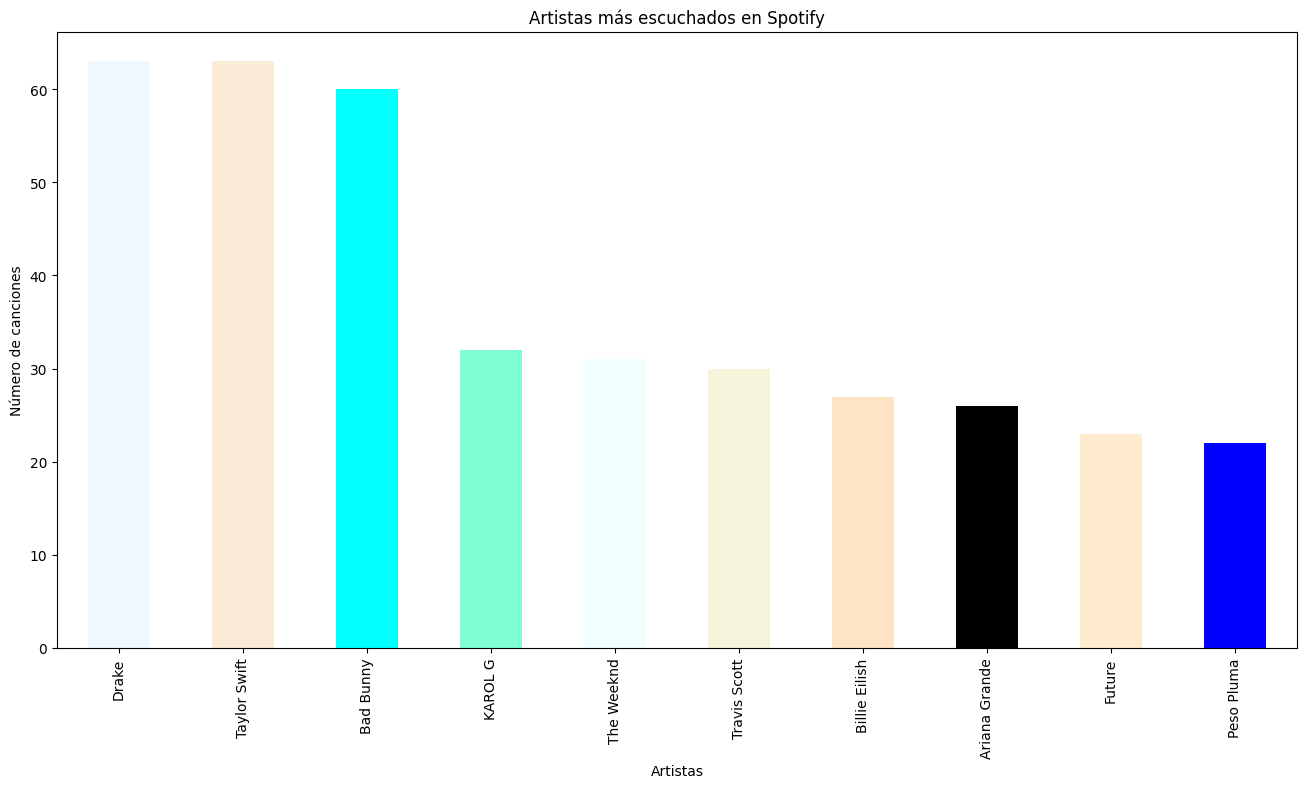

In [ ]:
#Artistas más escuchados en Spotify en base a la cantidad de canciones en lista de reproducciones

import matplotlib.colors as mcolors

plt.figure(figsize=(16, 8))
artistas_mas_escuchados.plot(kind='bar', color=list(mcolors.CSS4_COLORS.values())[:len(artistas_mas_escuchados)])
plt.xlabel('Artistas')
plt.ylabel('Número de canciones')
plt.title('Artistas más escuchados en Spotify')
plt.show()

In [ ]:
# Desglose por artista y por plataforma en función de los streams de cada uno de ellos

artistas_top10 = canciones_df.groupby('Artist')[['Spotify Playlist Count', 'Amazon Playlist Count', 'Apple Music Playlist Count', 'Shazam Counts']].sum().loc[canciones_df['Artist'].value_counts().head(10).index]
artistas_top10

,Spotify Playlist Count,Amazon Playlist Count,Apple Music Playlist Count,Shazam Counts
Artist,,,,
Drake,5680579.0,1396.0,4593.0,127447682.0
Taylor Swift,2371821.0,2678.0,4328.0,104482959.0
Bad Bunny,4209753.0,1135.0,3052.0,76694638.0
KAROL G,1044105.0,1056.0,1613.0,36667327.0
The Weeknd,3807569.0,891.0,4078.0,168335134.0
Travis Scott,2943128.0,595.0,1708.0,50358351.0
Billie Eilish,1911219.0,1285.0,3144.0,69482531.0
Ariana Grande,1847463.0,828.0,2730.0,80113724.0
Future,1220629.0,378.0,1307.0,34004269.0


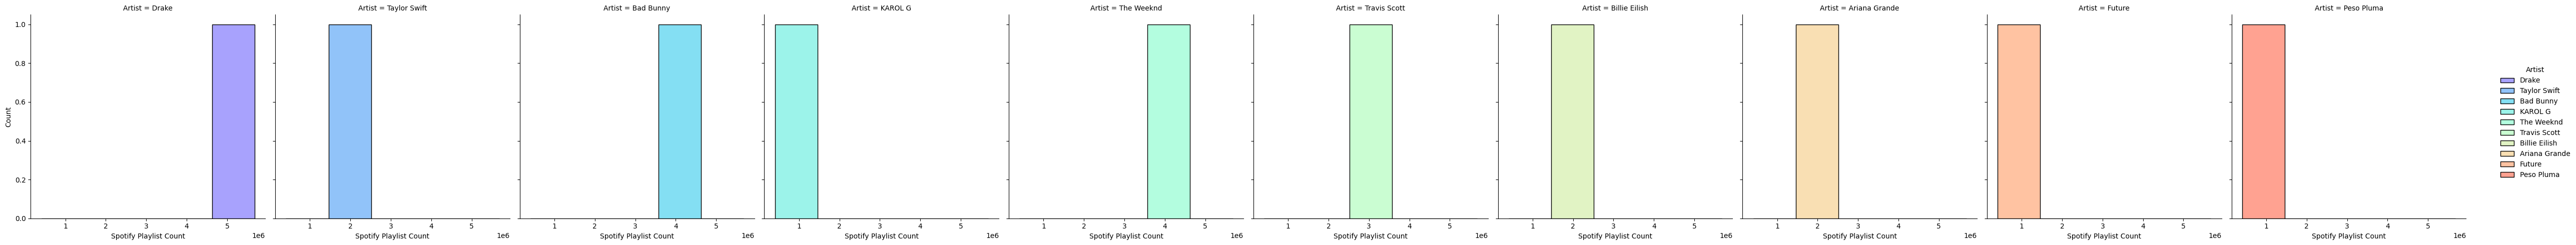

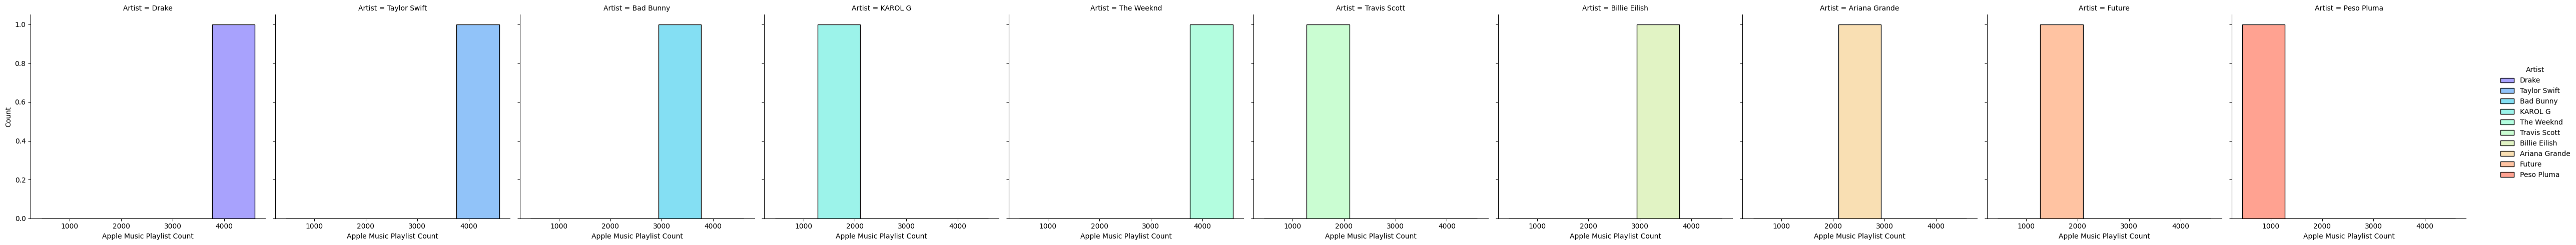

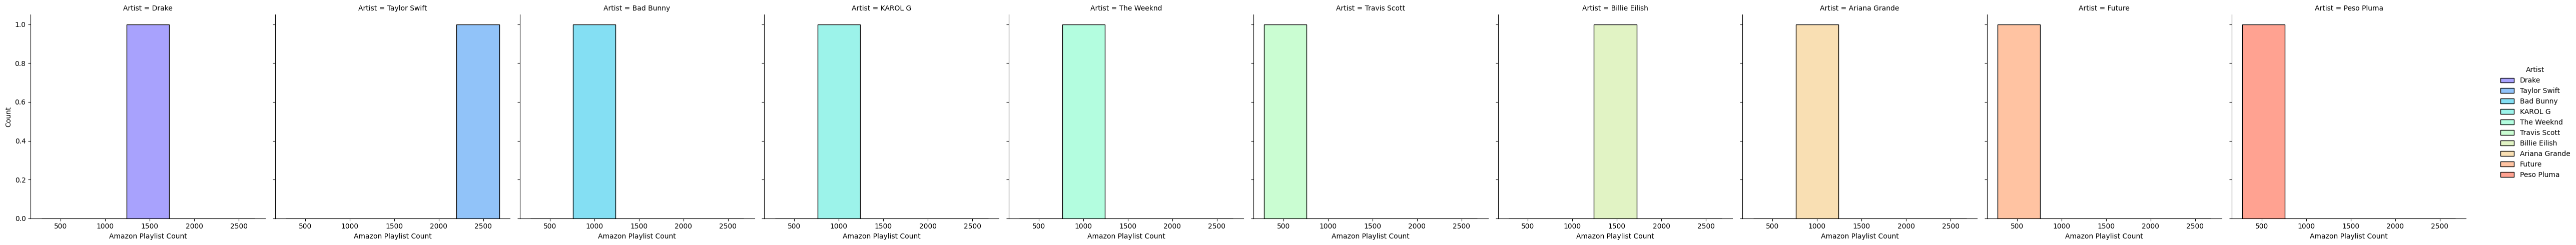

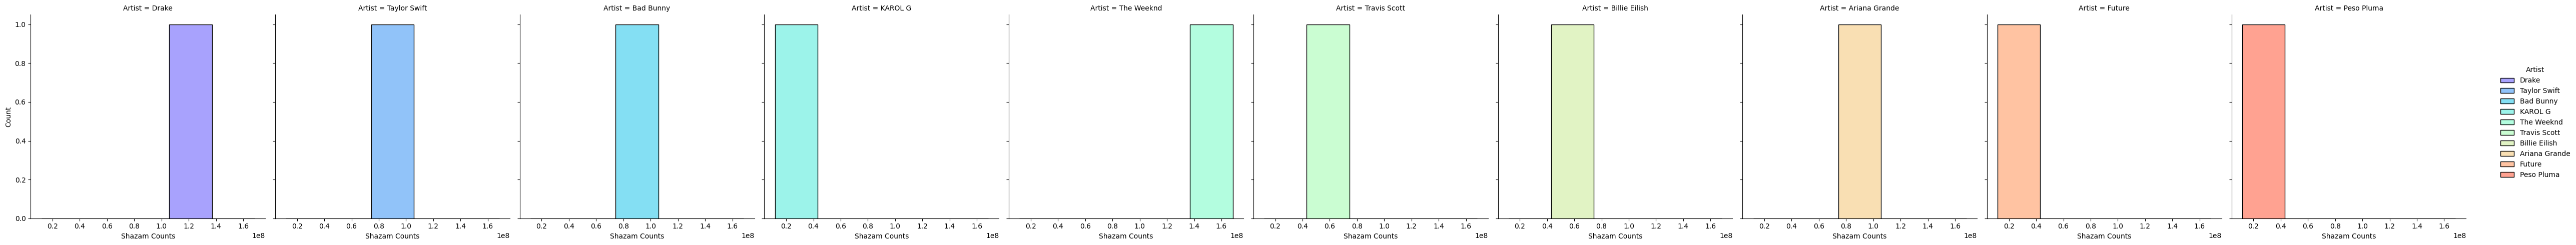

In [ ]:
sns.displot(artistas_top10, x='Spotify Playlist Count', hue='Artist', col='Artist',palette='rainbow')
sns.displot(artistas_top10, x='Apple Music Playlist Count', hue='Artist', col='Artist',palette='rainbow')
sns.displot(artistas_top10, x='Amazon Playlist Count', hue='Artist', col='Artist',palette='rainbow')
sns.displot(artistas_top10, x='Shazam Counts', hue='Artist', col='Artist',palette='rainbow')



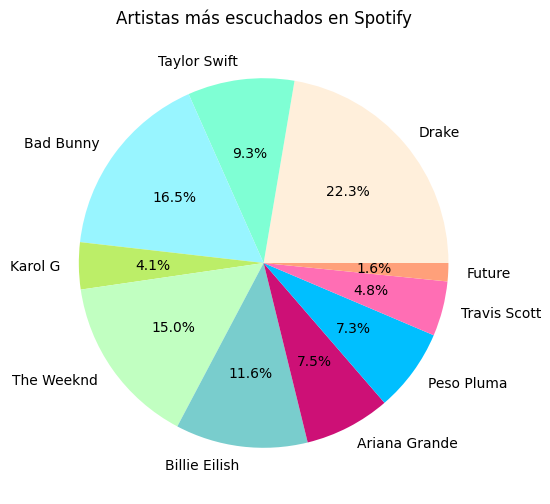

In [ ]:
#Porcentaje de importancia de cada artista en función de los 10 más escuchados en Spotify

artista = ['Drake', 'Taylor Swift', 'Bad Bunny', 'Karol G', 'The Weeknd', 'Billie Eilish', 'Ariana Grande', 'Peso Pluma', 'Travis Scott', 'Future']
data = [5680579.0, 2371821.0, 4209753.0, 1044105.0, 3807569.0, 2943128.0, 1911219.0, 1847463.0, 1220629.0, 405776.0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie (data, labels=artista, autopct='%1.1f%%', colors=['#FFEFDB', '#7FFFD4','#98F5FF','#BCEE68', '#C1FFC1', '#79CDCD', '#CD1076', '#00BFFF', '#FF6EB4', '#FFA07A'])
ax.set_title('Artistas más escuchados en Spotify')
plt.show()

In [ ]:
#Para conocer la cantidad de reproducciones en Spotify y YouTube del top 10 de artistas mas reproducidos

artistas_mas_reproducidos = canciones_df.groupby('Artist')[['Spotify Streams', 'YouTube Views']].sum().loc[canciones_df['Artist'].value_counts().head(10).index]
artistas_mas_reproducidos

,Spotify Streams,YouTube Views
Artist,,
Drake,3.496216e+10,1.153470e+10
Taylor Swift,3.447077e+10,2.014060e+10
Bad Bunny,3.705483e+10,2.507276e+10
KAROL G,1.376390e+10,1.717329e+10
The Weeknd,3.694854e+10,1.863560e+10
Travis Scott,1.646020e+10,5.033130e+09
Billie Eilish,1.681183e+10,7.863834e+09
Ariana Grande,2.346499e+10,1.937768e+10
Future,6.953640e+09,5.496759e+09


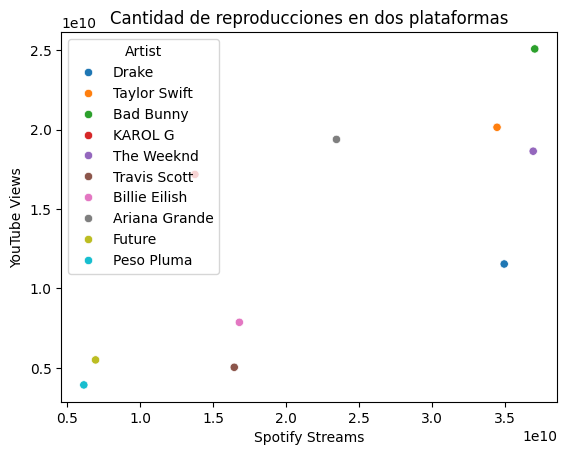

In [ ]:
sns.scatterplot(data=artistas_mas_reproducidos, x='Spotify Streams', y='YouTube Views', hue='Artist');
plt.title('Cantidad de reproducciones en dos plataformas')
plt.show()


In [ ]:
#Asignación de género a cada artista (en función de un análisis externo)

pop = ["Taylor Swift", "Billie Eilish", "Ariana Grande"]
hip_hop = ["Travis Scott", "Drake", "Bad Bunny", "Future"]
reggueaton = ["Karol G", "Peso Pluma"]
disco= ["The Weeknd"]


In [ ]:
artistas_top10 = canciones_df.groupby('Artist')[['Spotify Playlist Count', 'Amazon Playlist Count', 'Apple Music Playlist Count', 'Shazam Counts']].sum().loc[canciones_df['Artist'].value_counts().head(10).index]
artistas_top10

,Spotify Playlist Count,Amazon Playlist Count,Apple Music Playlist Count,Shazam Counts
Artist,,,,
Drake,5680579.0,1396.0,4593.0,127447682.0
Taylor Swift,2371821.0,2678.0,4328.0,104482959.0
Bad Bunny,4209753.0,1135.0,3052.0,76694638.0
KAROL G,1044105.0,1056.0,1613.0,36667327.0
The Weeknd,3807569.0,891.0,4078.0,168335134.0
Travis Scott,2943128.0,595.0,1708.0,50358351.0
Billie Eilish,1911219.0,1285.0,3144.0,69482531.0
Ariana Grande,1847463.0,828.0,2730.0,80113724.0
Future,1220629.0,378.0,1307.0,34004269.0


<ipython-input-23-2542c6f143eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Platform', y='Playlist Count', data=artistas_top10_melted, palette='rainbow')


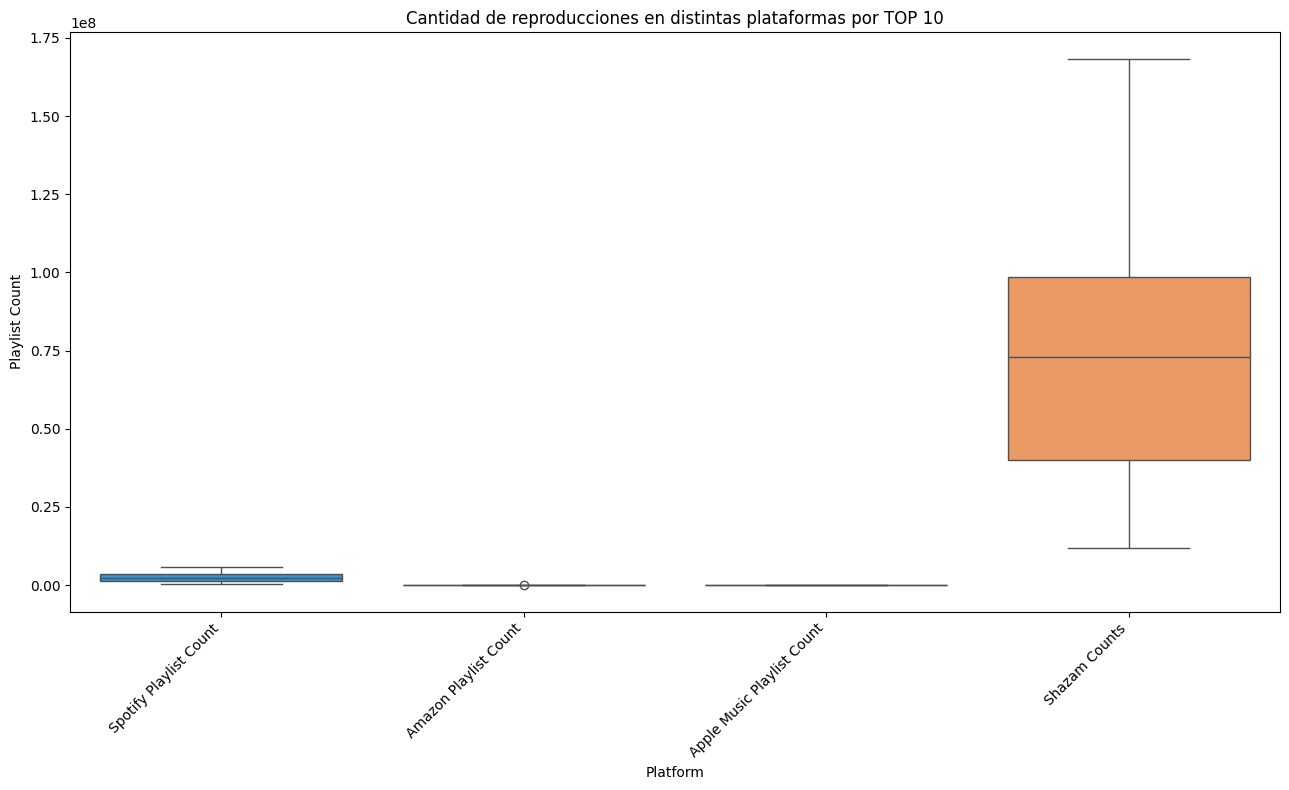

In [ ]:
#Para saber la incidencia de cada plataforma

artistas_top10_melted = pd.melt(artistas_top10.reset_index(), id_vars=['Artist'],
                                value_vars=['Spotify Playlist Count', 'Amazon Playlist Count',
                                            'Apple Music Playlist Count', 'Shazam Counts'],
                                var_name='Platform', value_name='Playlist Count')

plt.figure(figsize=(13, 8))
ax = sns.boxplot(x='Platform', y='Playlist Count', data=artistas_top10_melted, palette='rainbow')
ax.set_title('Cantidad de reproducciones en distintas plataformas por TOP 10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Códigos para conocer la cantidad de Count de cada tipo de género

stream_pop_S = canciones_df[canciones_df['Artist'].isin(pop)]['Spotify Playlist Count'].sum()
stream_hip_hop_S = canciones_df[canciones_df['Artist'].isin(hip_hop)]['Spotify Playlist Count'].sum()
stream_reggueaton_S = canciones_df[canciones_df['Artist'].isin(reggueaton)]['Spotify Playlist Count'].sum()
stream_disco_S = canciones_df[canciones_df['Artist'].isin(disco)]['Spotify Playlist Count'].sum()
stream_pop_AP = canciones_df[canciones_df['Artist'].isin(pop)]['Apple Music Playlist Count'].sum()
stream_hip_hop_AP = canciones_df[canciones_df['Artist'].isin(hip_hop)]['Apple Music Playlist Count'].sum()
stream_reggueaton_AP = canciones_df[canciones_df['Artist'].isin(reggueaton)]['Apple Music Playlist Count'].sum()
stream_disco_AP = canciones_df[canciones_df['Artist'].isin(disco)]['Apple Music Playlist Count'].sum()
stream_pop_AMZ = canciones_df[canciones_df['Artist'].isin(pop)]['Amazon Playlist Count'].sum()
stream_hip_hop_AMZ = canciones_df[canciones_df['Artist'].isin(hip_hop)]['Amazon Playlist Count'].sum()
stream_reggueaton_AMZ = canciones_df[canciones_df['Artist'].isin(reggueaton)]['Amazon Playlist Count'].sum()
stream_disco_AMZ = canciones_df[canciones_df['Artist'].isin(disco)]['Amazon Playlist Count'].sum()
stream_pop_Sh = canciones_df[canciones_df['Artist'].isin(pop)]['Shazam Counts'].sum()
stream_hip_hop_Sh = canciones_df[canciones_df['Artist'].isin(hip_hop)]['Shazam Counts'].sum()
stream_reggueaton_Sh = canciones_df[canciones_df['Artist'].isin(reggueaton)]['Shazam Counts'].sum()
stream_disco_Sh = canciones_df[canciones_df['Artist'].isin(disco)]['Shazam Counts'].sum()

stream_pop= stream_pop_S + stream_pop_AP + stream_pop_AMZ + stream_pop_Sh
stream_hip_hop= stream_hip_hop_S + stream_hip_hop_AP + stream_hip_hop_AMZ + stream_hip_hop_Sh
stream_reggueaton= stream_reggueaton_S + stream_reggueaton_AP + stream_reggueaton_AMZ + stream_reggueaton_Sh
stream_disco= stream_disco_S + stream_disco_AP + stream_disco_AMZ + stream_disco_Sh

print(stream_pop)
print(stream_hip_hop)
print(stream_reggueaton)
print(stream_disco)


260224710.0
302573193.0
12181273.0
172147672.0


In [ ]:
#Totales resultantes de cada género analizado

totales = pd.Series ([stream_pop, stream_hip_hop, stream_reggueaton, stream_disco], index=['Pop', 'Hip Hop', 'Reggueaton', 'Disco'])
totales



Pop           260224710.0
Hip Hop       302573193.0
Reggueaton     12181273.0
Disco         172147672.0
dtype: float64

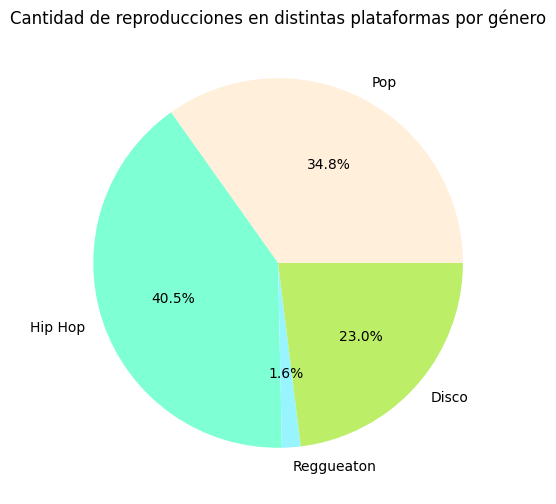

In [ ]:
#Distribución gráfica de los géneros musicales y la cantidad de streams por cada uno de ellos

genero = ['Pop', 'Hip Hop', 'Reggueaton', 'Disco']
data = [260224710.0, 302573193.0,12181273.0, 172147672.0 ]

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie (data, labels=genero, autopct='%1.1f%%',colors=['#FFEFDB', '#7FFFD4','#98F5FF','#BCEE68'])
ax.set_title('Cantidad de reproducciones en distintas plataformas por género')
plt.show()

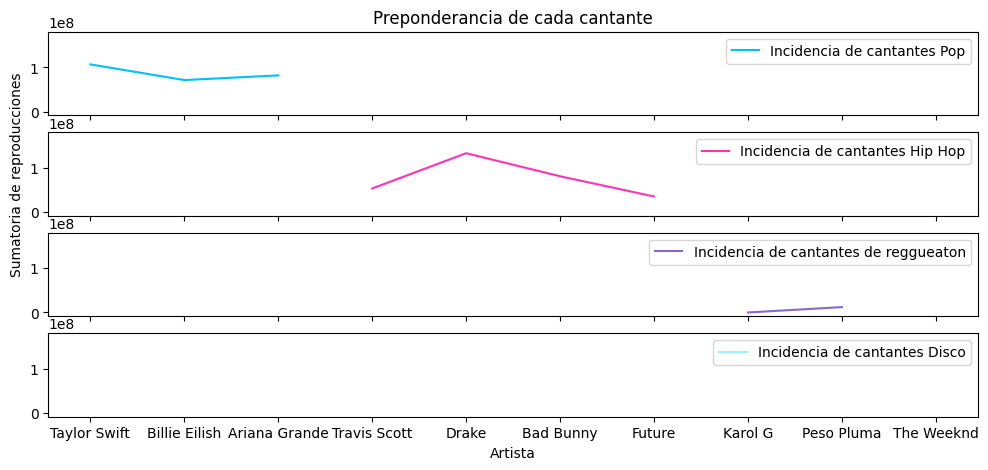

In [ ]:
#Incidencia de cada cantante (separado por género)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 5), sharex=True, sharey=True)

pop_streams = [canciones_df[canciones_df['Artist'] == artist]['Spotify Playlist Count'].sum()
                + canciones_df[canciones_df['Artist'] == artist]['Apple Music Playlist Count'].sum()
                + canciones_df[canciones_df['Artist'] == artist]['Amazon Playlist Count'].sum()
                + canciones_df[canciones_df['Artist'] == artist]['Shazam Counts'].sum() for artist in pop]

hiphop_streams = [canciones_df[canciones_df['Artist'] == artist]['Spotify Playlist Count'].sum()
                 + canciones_df[canciones_df['Artist'] == artist]['Apple Music Playlist Count'].sum()
                 + canciones_df[canciones_df['Artist'] == artist]['Amazon Playlist Count'].sum()
                 + canciones_df[canciones_df['Artist'] == artist]['Shazam Counts'].sum() for artist in hip_hop]

reggaeton_streams = [canciones_df[canciones_df['Artist'] == artist]['Spotify Playlist Count'].sum()
                     + canciones_df[canciones_df['Artist'] == artist]['Apple Music Playlist Count'].sum()
                     + canciones_df[canciones_df['Artist'] == artist]['Amazon Playlist Count'].sum()
                     + canciones_df[canciones_df['Artist'] == artist]['Shazam Counts'].sum() for artist in reggueaton]

disco_streams = [canciones_df[canciones_df['Artist'] == artist]['Spotify Playlist Count'].sum()
                 + canciones_df[canciones_df['Artist'] == artist]['Apple Music Playlist Count'].sum()
                 + canciones_df[canciones_df['Artist'] == artist]['Amazon Playlist Count'].sum()
                 + canciones_df[canciones_df['Artist'] == artist]['Shazam Counts'].sum() for artist in disco]

ax[0].plot(pop, pop_streams, label='Incidencia de cantantes Pop',color='#00BFFF')
ax[1].plot(hip_hop, hiphop_streams, label='Incidencia de cantantes Hip Hop', color='#FF34B3')
ax[2].plot(reggueaton, reggaeton_streams, label='Incidencia de cantantes de reggueaton', color='#8968CD')
ax[3].plot(disco, disco_streams, label='Incidencia de cantantes Disco', color='#98F5FF')
ax[0].set_title('Preponderancia de cada cantante')
ax[3].set_xlabel('Artista')
ax[1].set_ylabel('Sumatoria de reproducciones')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

##Conclusiones preliminares

En función de lo analizado precedentemente, se puede concluir (a priori) que; a diferencia de lo que se cree popularmente, el Pop no es el género más escuchado sino que es el Hip Hop, liderado el mismo por el cantante "Drake" como el más influyente y reconocido.
En concordancia con lo anterior, se pudo demostrar que los artistas más influyentes en Spotify (Drake y Taylor Swift, en este caso), también lo fueron en el resto de las plataformas consultadas; a saber Shazan, Amazon y Apple Music y que, la canción "Flowers" de Miley Cyrus, si bien fue mundialmente conocida y escuchada, no figura dentro de las 10 más escuchadas.
Si bien no era parte de una de las hipótesis planteadas, se arribó a la conclusión que Shazam es la plataforma más utilizada para escuchar música, superando por mucho a Spotify (que quedó en segundo lugar)
